# Market Sentiment vs Bond Market
### Boris Chu
The following notebook attempts to find correlations between the market sentiment through the 
S&P 500 and the bond market through US Treasuries. Namely, the yield curve will be calculated to 
see how investors react to a common recession warning sign. 

In [32]:
# Libraries used 

import quandl
import pandas as pd
from IPython.display import display
# Data vis packages
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Extracting data from Quandl

quandl.ApiConfig.api_key = 'uCFQdzxqSqyvo59r1ypD'
sentiment = quandl.get('AAII/AAII_SENTIMENT')
treasuries = quandl.get('USTREASURY/YIELD')

df = treasuries
df = df.join(sentiment)
df = df.dropna(subset=['Bearish', 'Bullish', 'Neutral'])
df

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,...,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,...,0.300000,1.000000,0.328750,0.100000,0.384907,0.488293,0.281522,359.69,352.20,352.20
1990-01-12,NaN,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,...,0.170000,1.000000,0.355000,0.280000,0.384907,0.488293,0.281522,353.79,339.93,339.93
1990-01-19,NaN,NaN,8.00,8.01,8.00,8.20,8.23,8.20,8.24,8.26,...,0.200000,1.000000,0.360000,0.110000,0.384907,0.488293,0.281522,340.75,337.00,339.15
1990-01-26,NaN,NaN,7.93,8.04,8.07,8.28,8.38,8.38,8.45,8.49,...,0.380000,1.000000,0.355000,-0.140000,0.384907,0.488293,0.281522,331.61,325.80,325.80
1990-02-02,NaN,NaN,8.07,8.17,8.13,8.37,8.43,8.42,8.46,8.50,...,0.480000,1.000000,0.335000,-0.330000,0.384907,0.488293,0.281522,330.92,322.98,330.92
1990-02-09,NaN,NaN,8.02,8.09,8.03,8.25,8.24,8.29,8.34,8.31,...,0.510000,1.000000,0.306250,-0.320000,0.384907,0.488293,0.281522,333.75,329.66,333.62
1990-02-16,NaN,NaN,7.94,8.07,8.09,8.36,8.34,8.41,8.43,8.42,...,0.340000,1.000000,0.290000,-0.110000,0.384907,0.488293,0.281522,334.89,330.08,332.72
1990-02-23,NaN,NaN,7.93,8.09,8.11,8.43,8.45,8.47,8.56,8.53,...,0.380000,1.000000,0.276250,-0.140000,0.384907,0.488293,0.281522,327.99,324.15,324.15
1990-03-02,NaN,NaN,8.02,8.17,8.22,8.48,8.50,8.50,8.57,8.54,...,0.420000,1.000000,0.252500,-0.210000,0.384907,0.488293,0.281522,335.54,328.67,335.54


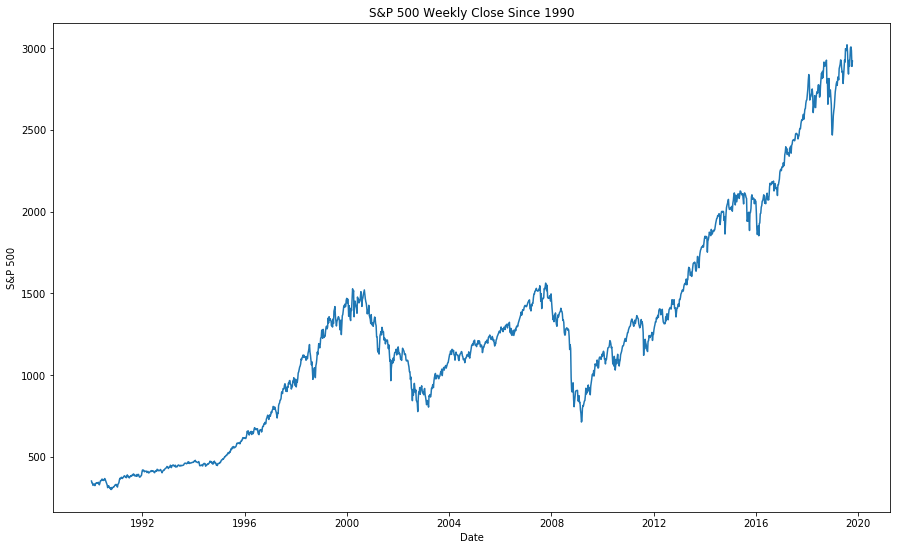

In [8]:
plt.plot(df['S&P 500 Weekly Close'])
plt.xlabel('Date')
plt.ylabel('S&P 500')
plt.title('S&P 500 Weekly Close Since 1990')
plt.rcParams['figure.figsize'] = [15, 9]
plt.show()


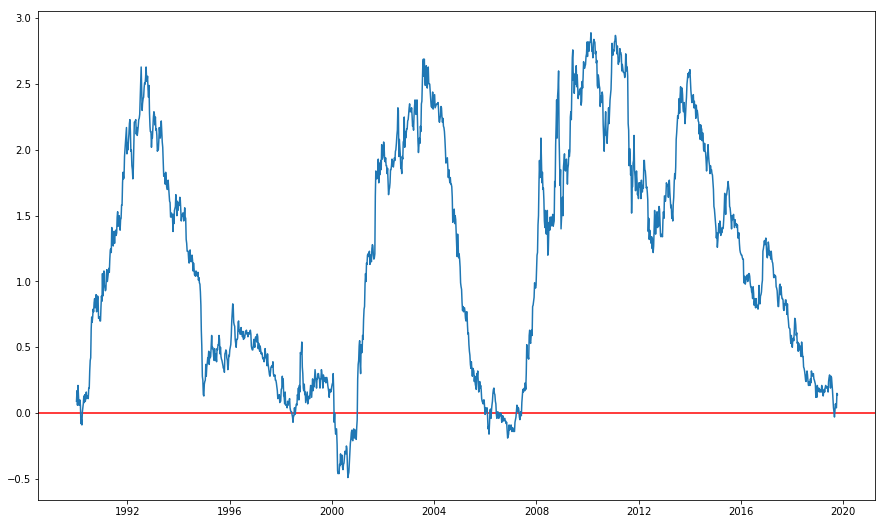

In [25]:
yield_curve = df['10 YR'] - df["2 YR"]
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(yield_curve)

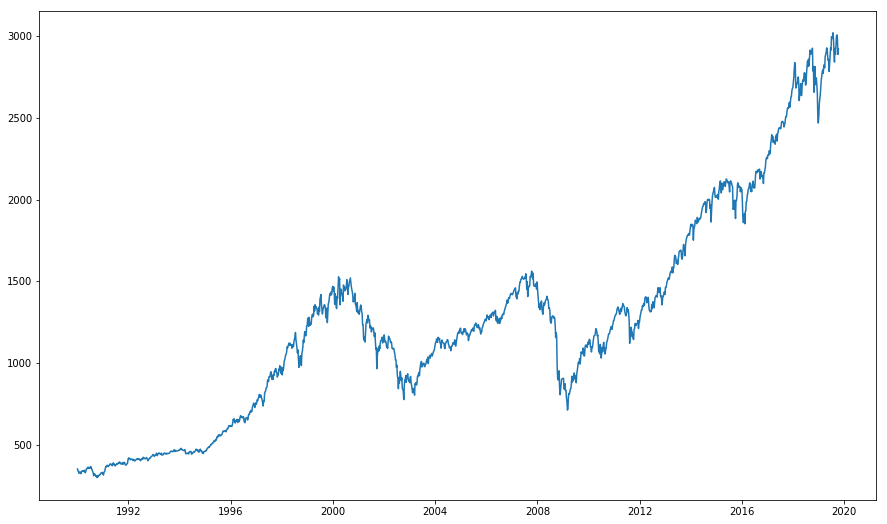

In [44]:
# yield_curve = pd.DataFrame({'date':yield_curve.index, '10YR-2YR':yield_curve.values})
# yield_curve['inverted'] = ["Yes" if curve < 0 else "No" for curve in yield_curve["10YR-2YR"]]
# df.join(yield_curve, on="Date"
df["10YR-2YR"] = df["10 YR"] - df["2 YR"]
df['Inverted'] = ["Yes" if curve < 0 else "No" for curve in df["10YR-2YR"]]
plt.plot(df['S&P 500 Weekly Close'])